<h1>Competation title-- Digit Recognizer</h1>
<href>https://www.kaggle.com/c/digit-recognizer</href>
<h3>Importing</h3>
<p>Importing module for this learning process</p>
<p>We will implement <b>NEURAL NETWORKS</b> for this purpose</p>

In [2]:
import tensorflow as tf
#from tensorflow.keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

<h3>Loading Dataset Path</h3>
Calling both the present dataset train and test from the kaggle directory

In [3]:
TRAIN_PATH = "train.csv"
TEST_PATH = "test.csv"

<h3>1. Reading Data</h3></br>
<p>Reading both the present csv by using the pandas module and checking the content of the given data</p>

In [4]:
train = pd.read_csv(TRAIN_PATH)
#train = train.reset_index()
test = pd.read_csv(TEST_PATH)
print('Training Data \n')
print(train.head(5))
print('Testing Data \n')
print(test.head(5))
print(train.shape)

Training Data 

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0   

<h3>2. Visualing data</h3>
<p>The Training Dataset consist of <b>42000 rows & 785 columns</b>out of 785 columns 1 column is label and the rest 784 is pixel value ranging from (0,255)</p>
<p>The Testing Dataset consist of <b>28000 rows & 784 columns</b> </p>

<Figure size 1000x700 with 0 Axes>

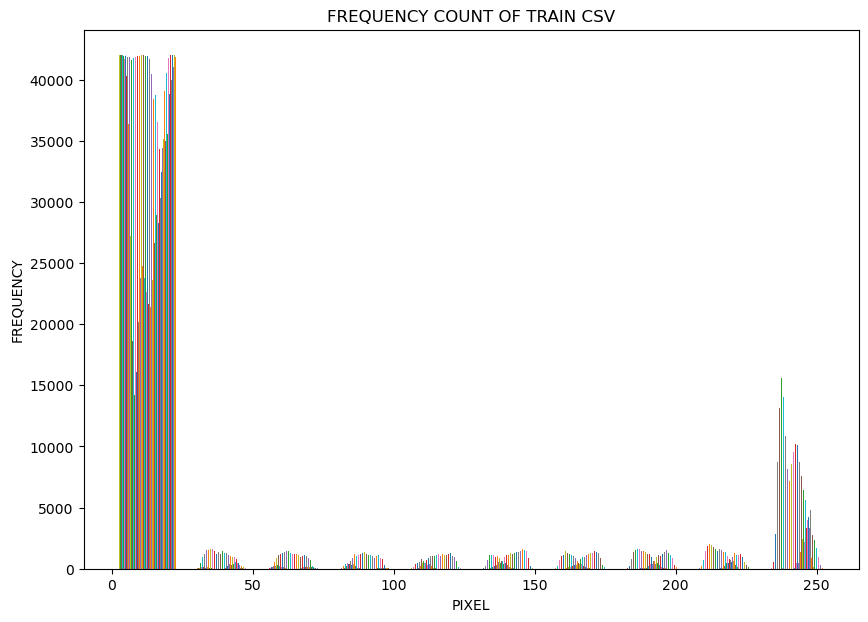

In [6]:
plt.figure(figsize = (10,7))
plt.hist(train.drop(['label'],axis=1))
plt.title('FREQUENCY COUNT OF TRAIN CSV')
plt.xlabel('PIXEL')
plt.ylabel('FREQUENCY')
plt.show()

<p>After Visulazing the train dataset we can see that most of pixel is in between the range (1,10) and we minor hike at pixel count of (230,250)</p>

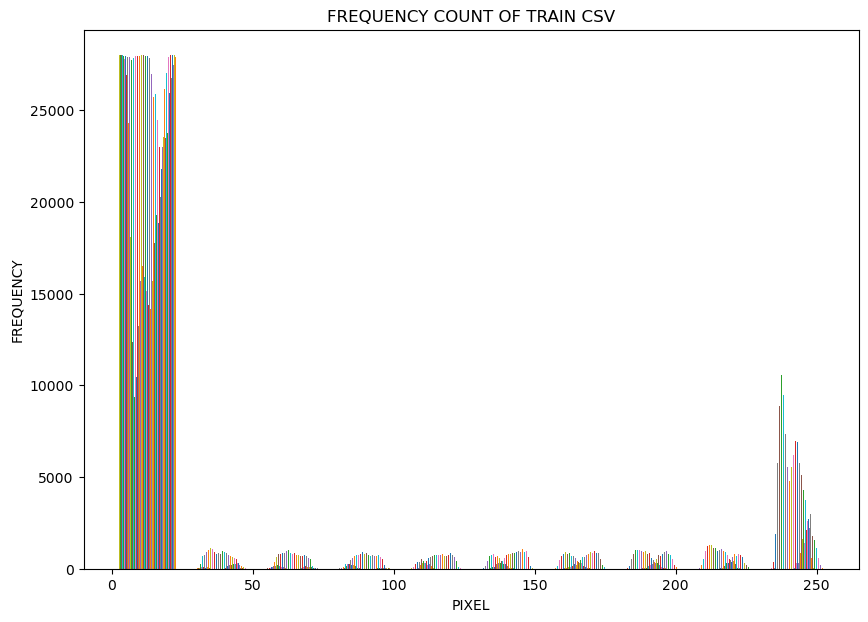

In [7]:
plt.figure(figsize = (10,7))
plt.hist(test)
plt.title('FREQUENCY COUNT OF TRAIN CSV')
plt.xlabel('PIXEL')
plt.ylabel('FREQUENCY')
plt.show()

<p>After Visulazing the test dataset we can see similar result as train i.e most of pixel is in between the range (1,10) and we minor hike at pixel count of (230,250)</p>

<h3>3. Preprocessing </h3></br>
<p>Part converting the pixel in the range of 0 and 1 and then converting the labels to cateogorical values, As the shape of the pixel is not appropiate then convert it into the required shape i.e. of (28,28)</p>

In [5]:
y=train['label']
X=train.drop(['label'],axis=1)
X=X/255

<h3> KNN </h3>
<p>This process consist of various steps such as</p>
<ol>
<li>Splitting the data </li>
<li>Training the model </li>
<li>predecting the model </li>
<li>Calculating the accuracy and ploting the confusion matrix</li>
</ol>

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
knn_pred = knn.predict(X_test)
knn_pred[:5]

array([4, 6, 5, 2, 8])

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       823
           1       0.97      0.99      0.98       935
           2       0.98      0.97      0.98       838
           3       0.96      0.96      0.96       813
           4       0.97      0.97      0.97       787
           5       0.95      0.97      0.96       722
           6       0.98      0.99      0.99       832
           7       0.97      0.97      0.97       905
           8       0.99      0.94      0.96       854
           9       0.96      0.96      0.96       891

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



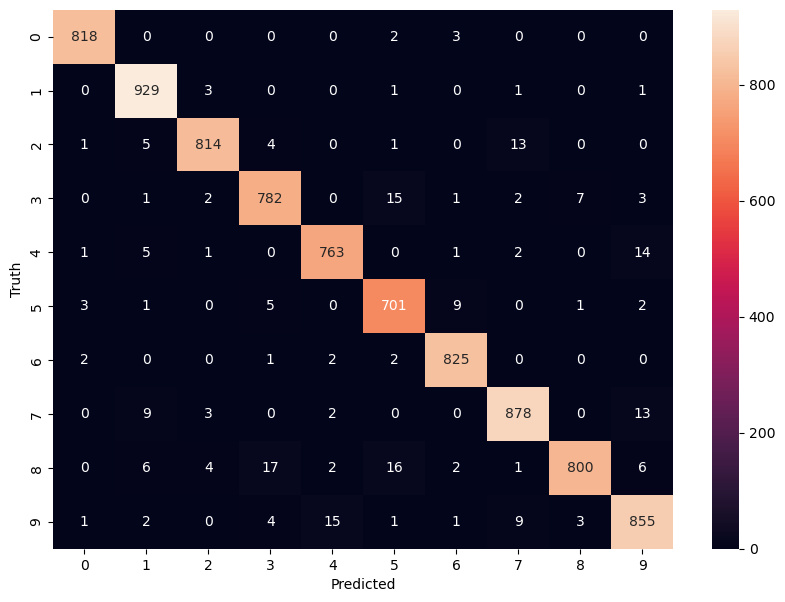

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
knm=confusion_matrix(y_test,knn_pred)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(knm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test,knn_pred))
plt.show()


<h3>Random Forest</h3>
<p>This process consist of various steps such as</p>
<ol>
<li>Splitting the data </li>
<li>Training the model </li>
<li>predecting the model </li>
<li>Calculating the accuracy and ploting the confusion matrix</li>
</ol>

In [13]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
rf = RandomForestRegressor(n_estimators = 1, random_state = 42)

In [14]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1, random_state=42)

In [15]:
rfg_pred = rf.predict(X_test)
rfg_pred[:5]

array([3., 9., 3., 8., 7.])

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       800
           1       0.91      0.92      0.92       958
           2       0.78      0.77      0.77       832
           3       0.77      0.75      0.76       901
           4       0.81      0.81      0.81       805
           5       0.71      0.73      0.72       762
           6       0.85      0.84      0.84       838
           7       0.82      0.85      0.84       875
           8       0.72      0.69      0.70       838
           9       0.74      0.76      0.75       791

    accuracy                           0.80      8400
   macro avg       0.80      0.80      0.80      8400
weighted avg       0.80      0.80      0.80      8400



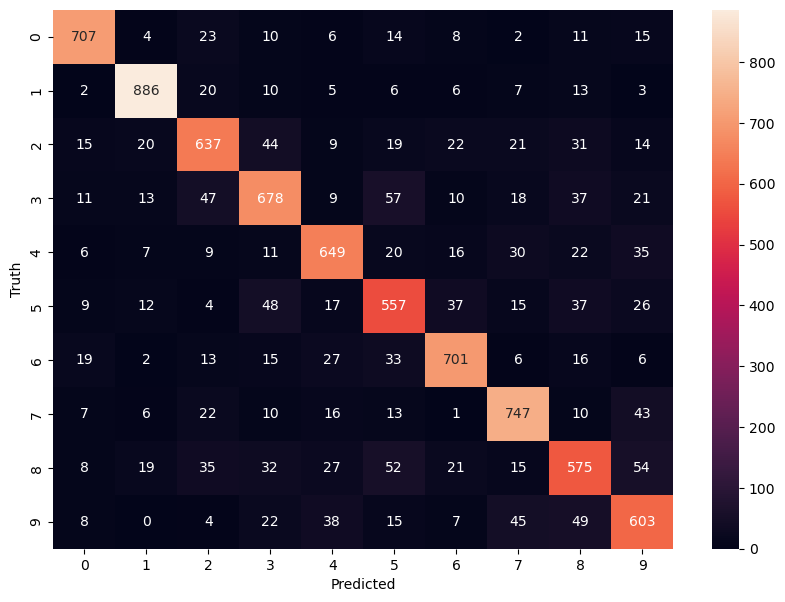

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
rfg=confusion_matrix(y_test,rfg_pred)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(rfg, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test,rfg_pred))
plt.show()

<h3>Linear Regression</h3>


In [17]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
LR=LinearRegression()

In [18]:
LR.fit(X_train,y_train)

LinearRegression()

In [19]:
lr_pred = rf.predict(X_test)
lr_pred[:5]

array([8., 8., 5., 2., 0.])

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       847
           1       0.96      0.97      0.97       971
           2       0.89      0.90      0.90       856
           3       0.88      0.89      0.89       858
           4       0.91      0.92      0.91       772
           5       0.87      0.87      0.87       771
           6       0.92      0.89      0.90       818
           7       0.92      0.93      0.92       872
           8       0.85      0.84      0.84       843
           9       0.88      0.89      0.88       792

    accuracy                           0.91      8400
   macro avg       0.90      0.90      0.90      8400
weighted avg       0.91      0.91      0.91      8400



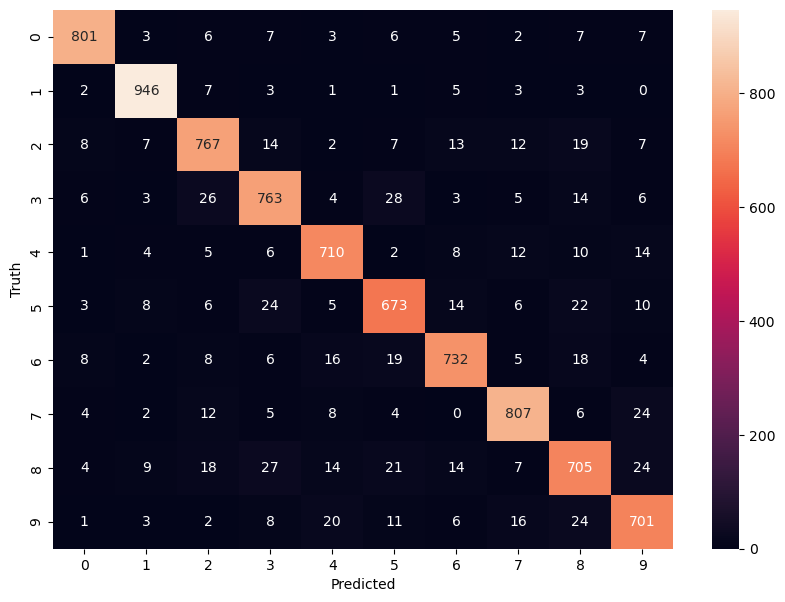

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
lrgc=confusion_matrix(y_test,lr_pred)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(lrgc, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test,lr_pred))
plt.show()

<h3>Logistic Regression</h3>

In [21]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
log=LogisticRegression()

In [22]:
log.fit(X_train,y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/tensor_flow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
log_pred = rf.predict(X_test)
log_pred[:5]

array([3., 8., 1., 2., 2.])

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       813
           1       0.96      0.97      0.96       934
           2       0.88      0.90      0.89       772
           3       0.88      0.89      0.88       869
           4       0.90      0.90      0.90       820
           5       0.87      0.85      0.86       758
           6       0.92      0.91      0.92       830
           7       0.94      0.94      0.94       917
           8       0.86      0.86      0.86       831
           9       0.89      0.89      0.89       856

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



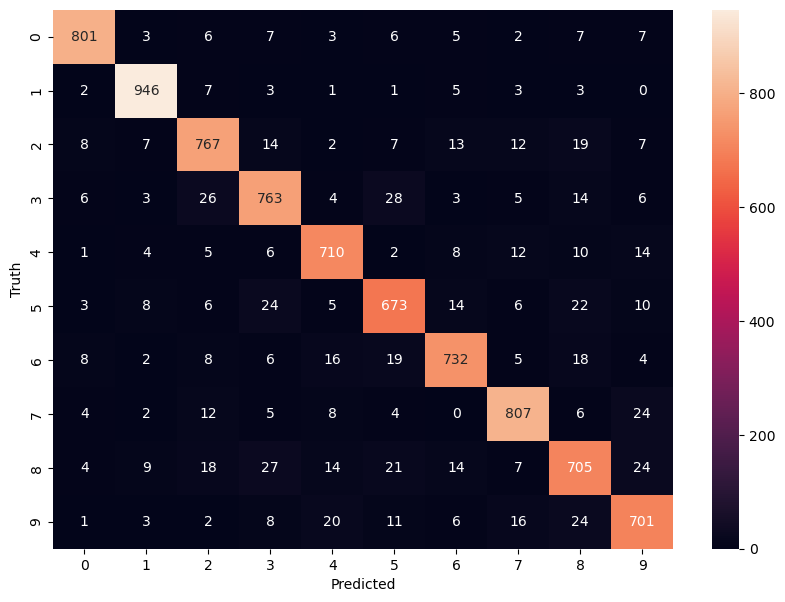

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
logc=confusion_matrix(y_test,log_pred)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(lrgc, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test,log_pred))
plt.show()

<h3> CNN </h3>
<p>This process consist of various steps such as</p>
<ol>
    <li>Spliting the data</li>
    <li>Visualizing the split data</li>
    <li>Defining the Module</li>
    <li>Training the Module</li>
    <li>Visualizing accuracy & loss of Module</li>
<ol>
    

<h4>Spliting the data</h4>
<p>Using the <b>train_test_split</b> from sklearn to split the data into <b>training and validation set i.e (80% of training & 20% of validation)</b></p>

In [6]:
X = X.values.reshape(-1,28,28,1)
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2, random_state=42)

<h4>Visualizing the split data</h4>
<p>We visualize the label and the pixel value of the training data of the first  image</p>

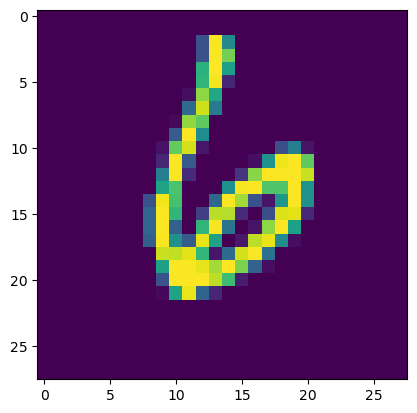

In [7]:
plt.imshow((tf.squeeze(x_train[0])))
plt.show()

<h4>Defining Module</h4>
<p>For this purpose we will use the tensorflow and declare our layers and convolutional</p>

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0

<h4>Training the module</h4>
<p>Using ImageDataGenerator from tensorflow to train the training and the validation data</p>

In [9]:
train_datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False
                            )
train_generator = train_datagen.flow(x_train, y_train,
                                     batch_size=32,
                                     shuffle=True)

val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(x_val, y_val,
                                 batch_size=32,
                                 shuffle=True)
history=model.fit(
                train_generator,
                epochs=30,
                validation_data=val_generator,
                verbose=1)

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1043/1050 [============================>.] - ETA: 0s - loss: 1.0862 - accuracy: 0.6363WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x1522c9700> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOS

<h4>Visualizing accuracy, loss of Module& Confusion Matrix </h4>
<p>In this portion we willl visulaize the various parameters of the the we obtained after trainig the model and we find the relation between them to visualization is the best way to check weather the model is overfitting , underfitting or justperfect. In Deep Learning, the loss function is used by the model to learn. The goal of the model is to minimize the value of the loss. This is done by using techniques such as gradient descent, which changes the model parameters using the information of the result of the loss.</p>
<p>From the Chart of losses of training and validation we can see that both the losses gradually decrease which indicate the model is doing well we can see the drastic changes indicating the model is tring to learn.  </p>

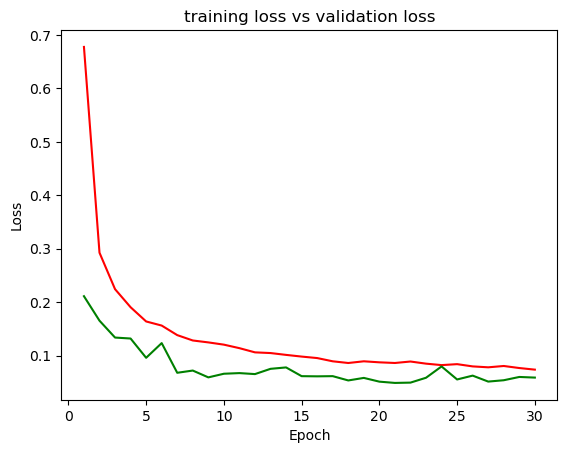

In [29]:
training_loss = history.history['loss']
val_loss=history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
#plt.figure(figsize = (10,7))
plt.plot(epoch_count, training_loss, 'r')
plt.plot(epoch_count, val_loss, 'g')
plt.title('training loss vs validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<p>From the Chart of training accuracy and validation accuracy we can se the gradual increase in the acurracy of both the training aswell as validation accuracy thus showing there is no underfitting as well as overfitting </p>

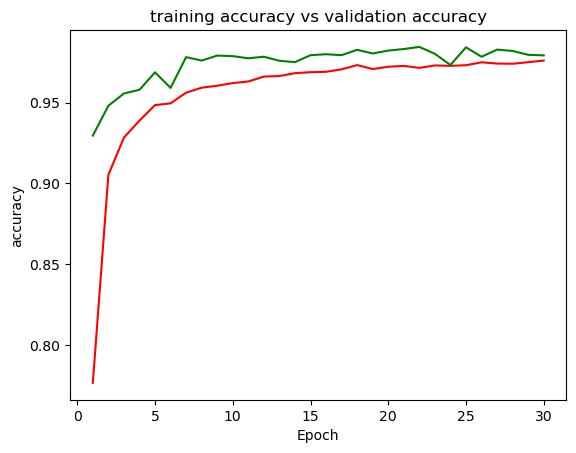

In [30]:
training_loss = history.history['accuracy']
val_loss=history.history['val_accuracy']
epoch_count = range(1, len(training_loss) + 1)
#plt.figure(figsize = (10,7))
plt.plot(epoch_count, training_loss, 'r')
plt.plot(epoch_count, val_loss, 'g')
plt.title('training accuracy vs validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

<h5>Predicting the values and ploting confusing matrix </h5>
<p>As we can see that all the diagonal elements are correct predictions, for example, we correctly predicted the number 0, 801 times.</p>
<p>Here the labels are the actual values and the predictions are the values that model predicted</p>

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
y_predicted = model.predict(x_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confmat=confusion_matrix(y_val,y_predicted_labels)
confmat

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


<p>ploating the confusion value using the seaborn library taking input as the confusion matrix from the above cell o/p</p> 

In [1]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confmat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_val,y_predicted_labels))
plt.show()

NameError: name 'plt' is not defined